Calculating $\pi$ using Monte-Carlo Simulation
-------
One solution to the problem statement $\textbf{7.17}$ in $\textbf{10th}$ edition of Operating System Concepts by ABRAHAM SILBERSCHATZ, PETER BAER GALVIN, GREG GAGNE using Python

Prerequisites / Import statements
--------
------------

In [2]:
import numpy as np
from numpy import random
import threading
from threading import Lock
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import time

Multithreaded Version of Monte-Carlo Simulation to calculate $\pi$ using multiple threads
--------

Computation time of child_thread1 = 3.0155039999999467ms
Computation time of child_thread2 = 3.151293000000166ms
Computation time of child_thread3 = 3.1629830000001746ms
Computation time of child_thread4 = 3.1518630000002545ms
Computation time of parent_thread = 17.45181099999993ms
Actual Pi : 3.141592653589793
Pi we estimated : 3.1508


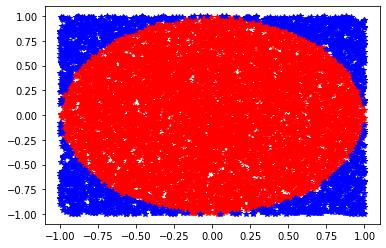

In [5]:
mutex = Lock()
n_points = 10000
rectx = []
recty = []
circlex = []
circley = []
our_pi = 0
total_points = n_points
'''
Gets random points within the square (-1,0);(0,-1);(1,0);(0,1)
And also checks if it lies within the circle (that is the circle of max area inscribed in this square) and square or just the square
 '''
def get_points(eachThread_points, thread_num):
  mutex.acquire() 
  global n_points
  try :
    tic = time.process_time()
    for i in range(eachThread_points) :
      x = random.uniform(-1,1)
      y = random.uniform(-1,1)
      temp = x**2 + y**2
      if(temp<=1) :
        circlex.append(x)
        circley.append(y)
      else :
        rectx.append(x)
        recty.append(y)
    #points_in_circle = circlex.size()
    #points_in_rect = rectx.size()
      n_points = n_points - 1;
  finally :
    mutex.release()
    toc = time.process_time()
    print("Computation time of child_thread"+str(thread_num)+" = "+str(1000*(toc - tic ))+"ms")

'''
  Each of the child thread will create some number of random points and then n_points is updated 
  by each child thread, so that the other threads know how many points are still left.
  For protecting against race condition, I am using mutex Locks.
  '''
def get_pi(n_points):
  eachThread_points = int(n_points/4)
  child_thread1 = threading.Thread(target = get_points, args=(eachThread_points,1,))    
  child_thread2 = threading.Thread(target = get_points, args=(eachThread_points,2,))    
  child_thread3 = threading.Thread(target = get_points, args=(eachThread_points,3,))    
  child_thread4 = threading.Thread(target = get_points, args=(eachThread_points,4,))
  child_thread1.start()
  child_thread2.start()
  child_thread3.start()
  child_thread4.start()
  child_thread1.join()
  child_thread2.join()
  child_thread3.join()
  child_thread4.join()
    
parent_thread = threading.Thread(target=get_pi,args=(n_points,))
parent_thread.start()
tic = time.process_time()
parent_thread.join()
toc = time.process_time()
print("Computation time of parent_thread = "+str(1000*(toc - tic ))+"ms")
print("Actual Pi : " + str(np.pi))
our_pi = 4*(len(circlex)/total_points)
print("Pi we estimated : " + str(our_pi))
# Plot
plt.plot(circlex,circley,'r*')
plt.plot(rectx,recty,'b*')